# Water Quality Prediction

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/waterQuality1.csv')

## Exploratory Data Analysis

In [3]:
df.head(5)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [4]:
df.shape

(7999, 21)

In [5]:
df.size

167979

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
aluminium,7999.0,0.666158,1.265145,0.0,0.040,0.070,0.280,5.05
arsenic,7999.0,0.161445,0.252590,0.0,0.030,0.050,0.100,1.05
barium,7999.0,1.567715,1.216091,0.0,0.560,1.190,2.480,4.94
cadmium,7999.0,0.042806,0.036049,0.0,0.008,0.040,0.070,0.13
chloramine,7999.0,2.176831,2.567027,0.0,0.100,0.530,4.240,8.68
chromium,7999.0,0.247226,0.270640,0.0,0.050,0.090,0.440,0.90
copper,7999.0,0.805857,0.653539,0.0,0.090,0.750,1.390,2.00
flouride,7999.0,0.771565,0.435373,0.0,0.405,0.770,1.160,1.50
bacteria,7999.0,0.319665,0.329485,0.0,0.000,0.220,0.610,1.00
viruses,7999.0,0.328583,0.378096,0.0,0.002,0.008,0.700,1.00


In [8]:
df.isnull().sum()

,0
aluminium,0
ammonia,0
arsenic,0
barium,0
cadmium,0
chloramine,0
chromium,0
copper,0
flouride,0
bacteria,0


In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

,0
aluminium,495
ammonia,2564
arsenic,107
barium,480
cadmium,23
chloramine,812
chromium,91
copper,201
flouride,151
bacteria,101


In [11]:
# Finding all the unique value of is_safe & Ammonia column

df_is_safe = df['is_safe'].unique()
df_ammonia = df['ammonia'].unique()
print(df_is_safe)
print(df_ammonia)

['1' '0' '#NUM!']
['9.08' '21.16' '14.02' ... '2.78' '27.12' '10']


In [12]:
# Total number of rows with #NUM! values

count_is_safe = df[df['is_safe'] == '#NUM!'].shape[0]
print(f"Number of rows with Num Values: {count_is_safe}")

Number of rows with Num Values: 3


## Data Visualization

In [13]:
# Creating a Copy of Dataframe for data visualization

df = df[df['is_safe'] != '#NUM!'] # Data Cleaning and Preprocessing
df = df.astype({'is_safe': int})
df['ammonia'] = pd.to_numeric(df['ammonia'], errors='coerce')
df = df.dropna(subset=['ammonia'])
df = df.astype({'ammonia': int})

df_dv = df.copy()

<Figure size 1200x600 with 0 Axes>

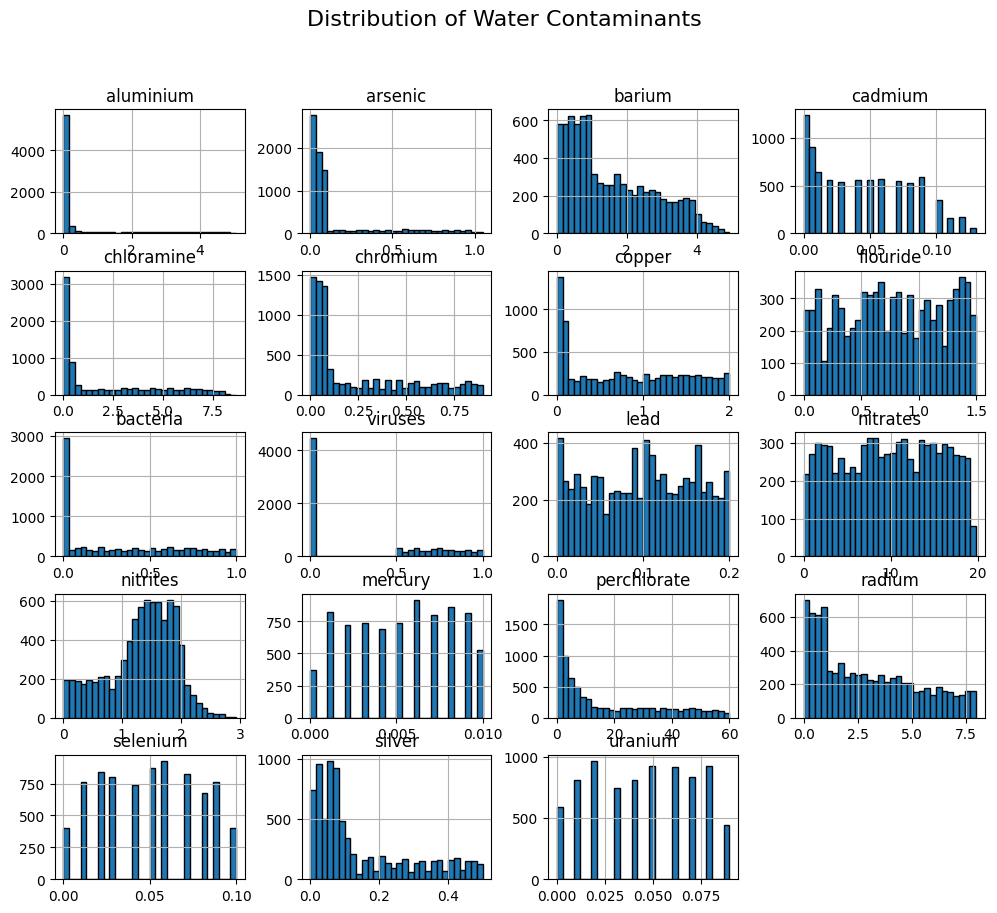

In [14]:
# Distribution of Contaminants

plt.figure(figsize=(12, 6))
df_dv.drop(columns=['is_safe', 'ammonia']).hist(figsize=(12, 10), bins=30, edgecolor='black', layout=(5, 4))
plt.suptitle('Distribution of Water Contaminants', fontsize=16)
plt.show()

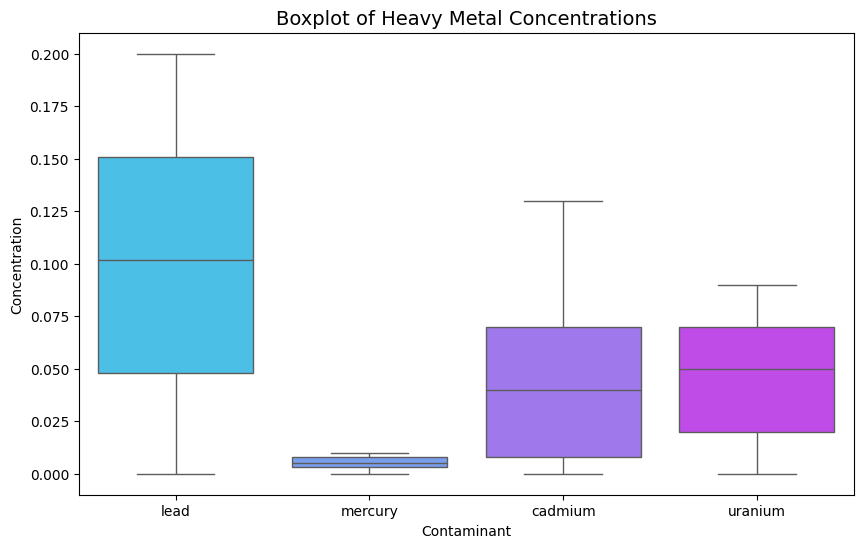

In [15]:
# Boxplot for Heavy Metals

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_dv[['lead', 'mercury', 'cadmium', 'uranium']], palette='cool')
plt.title('Boxplot of Heavy Metal Concentrations', fontsize=14)
plt.xlabel('Contaminant')
plt.ylabel('Concentration')
plt.show()

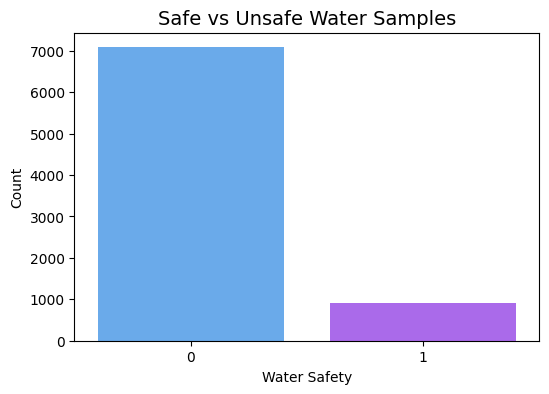

In [16]:
# Count of Safe vs Unsafe Water Samples

plt.figure(figsize=(6, 4))
sns.countplot(data=df_dv, x='is_safe', palette='cool')
plt.title('Safe vs Unsafe Water Samples', fontsize=14)
plt.xlabel('Water Safety')
plt.ylabel('Count')
plt.show()

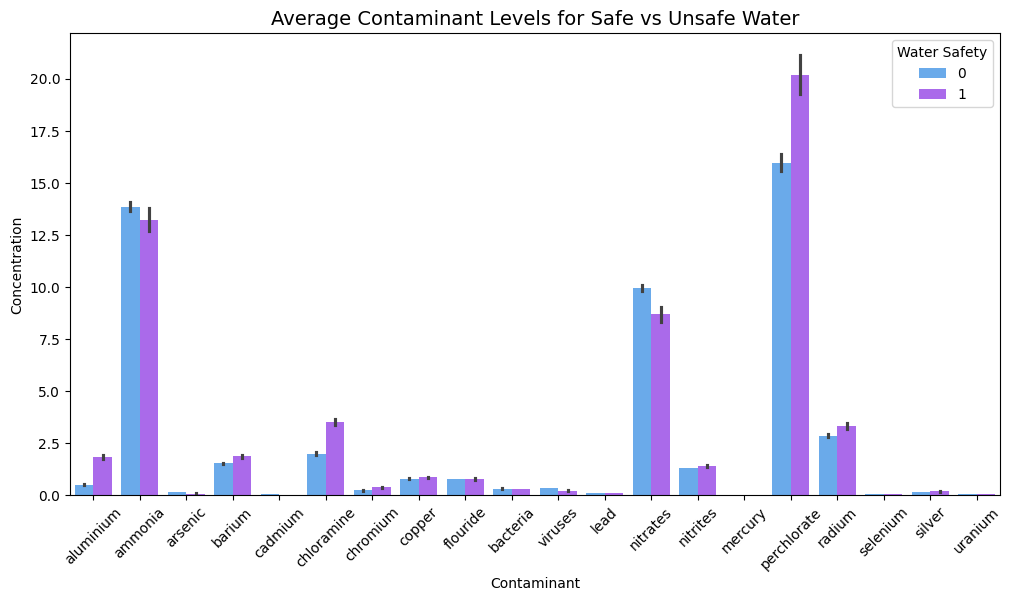

In [17]:
# Average Contaminant Levels for Safe vs Unsafe Water

plt.figure(figsize=(12, 6))
df_melted = df_dv.melt(id_vars=['is_safe'], value_vars=df_dv.columns[:-1], var_name='Contaminant', value_name='Concentration')
sns.barplot(data=df_melted, x='Contaminant', y='Concentration', hue='is_safe', palette='cool')
plt.title('Average Contaminant Levels for Safe vs Unsafe Water', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Water Safety')
plt.show()

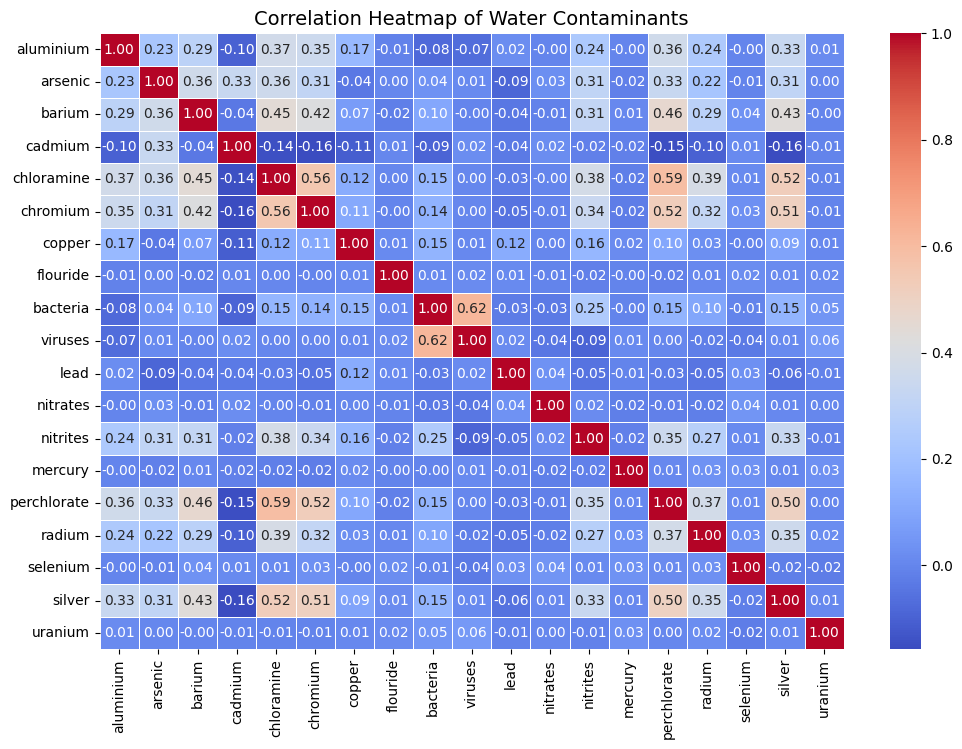

In [18]:
# Correlation Heatmap of Contaminants

plt.figure(figsize=(12, 8))
sns.heatmap(df_dv.drop(columns=['is_safe', 'ammonia']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Water Contaminants', fontsize=14)
plt.show()

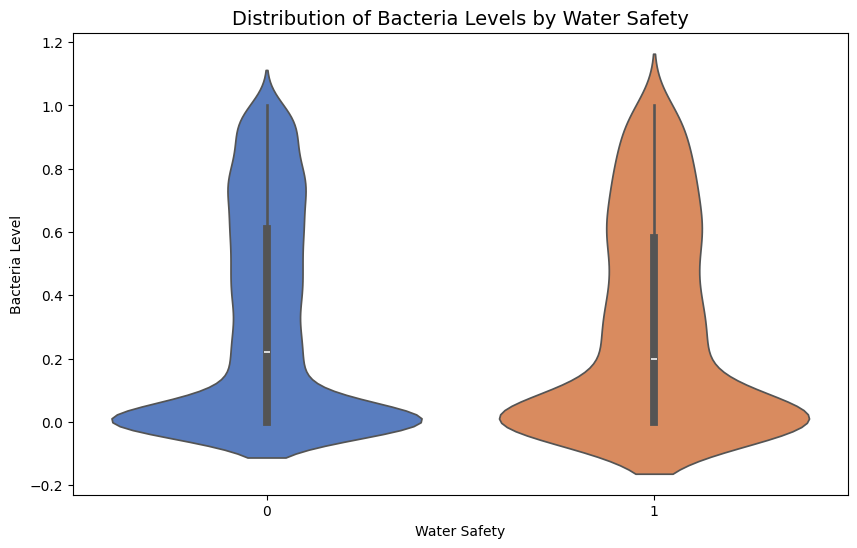

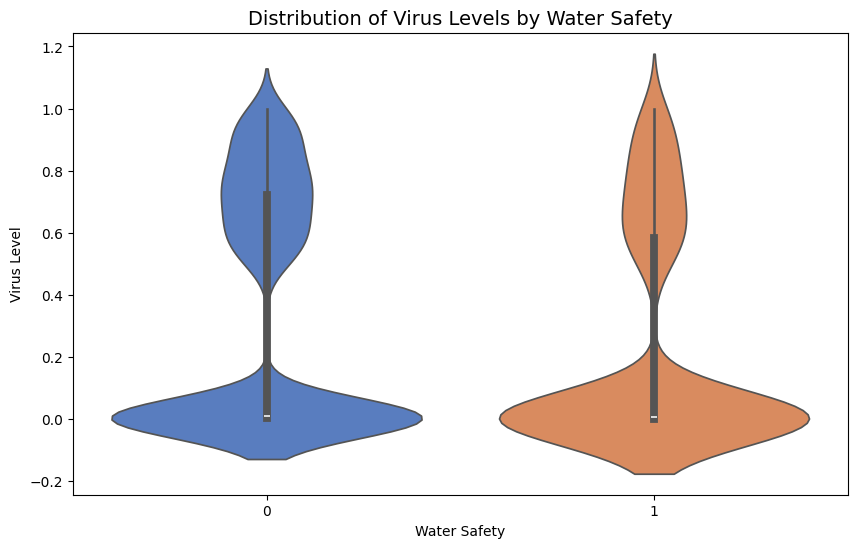

In [19]:
# Violin Plot for Bacteria and Viruses by Water Safety

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_dv, x='is_safe', y='bacteria', palette='muted')
plt.title('Distribution of Bacteria Levels by Water Safety', fontsize=14)
plt.xlabel('Water Safety')
plt.ylabel('Bacteria Level')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_dv, x='is_safe', y='viruses', palette='muted')
plt.title('Distribution of Virus Levels by Water Safety', fontsize=14)
plt.xlabel('Water Safety')
plt.ylabel('Virus Level')
plt.show()

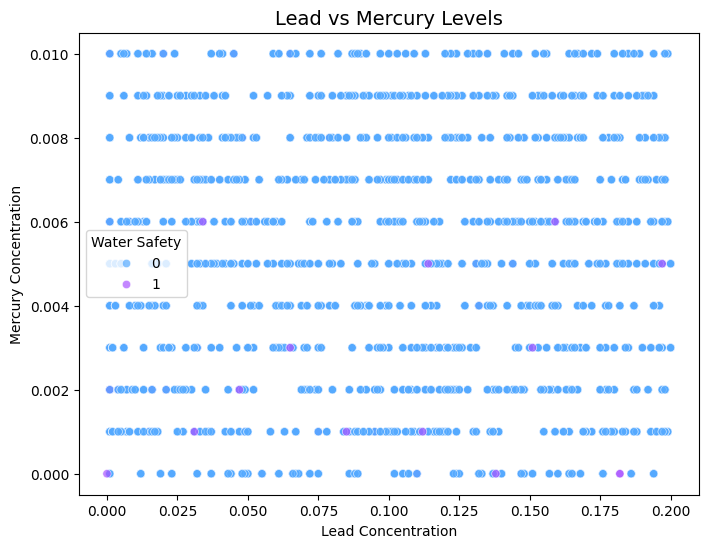

In [20]:
# Scatter Plot of Lead vs Mercury Levels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_dv, x='lead', y='mercury', hue='is_safe', palette='cool', alpha=0.7)
plt.title('Lead vs Mercury Levels', fontsize=14)
plt.xlabel('Lead Concentration')
plt.ylabel('Mercury Concentration')
plt.legend(title='Water Safety')
plt.show()

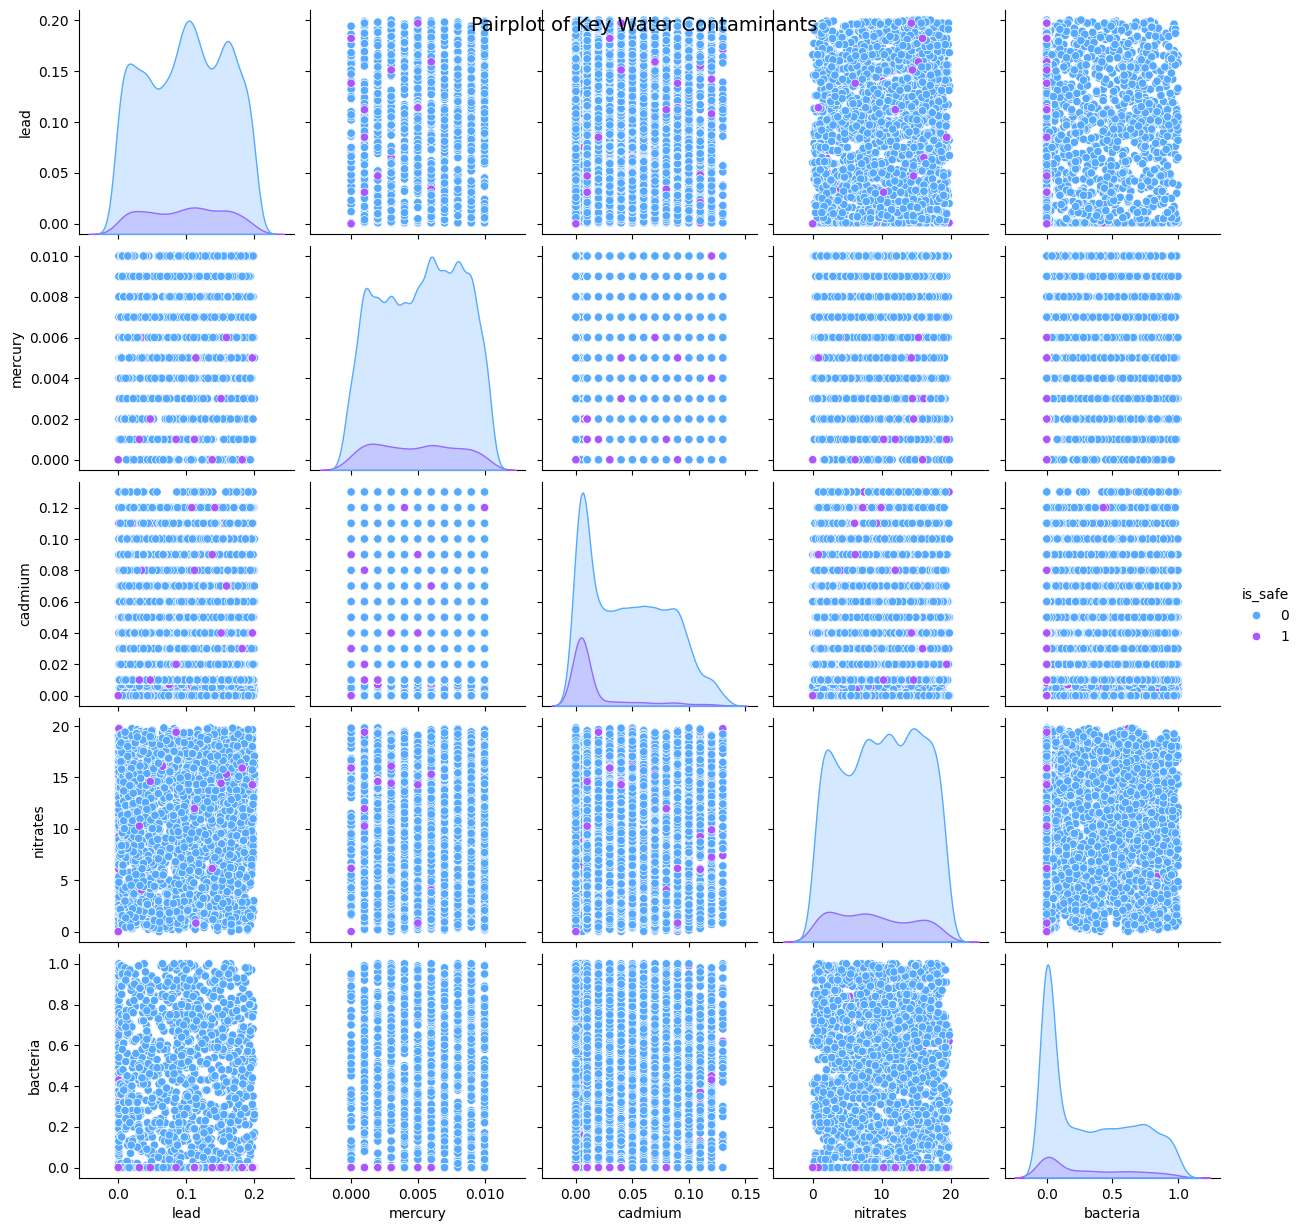

In [21]:
# Pairplot for Key Contaminants

sns.pairplot(df_dv, vars=['lead', 'mercury', 'cadmium', 'nitrates', 'bacteria'], hue='is_safe', palette='cool')
plt.suptitle('Pairplot of Key Water Contaminants', fontsize=14)
plt.show()

## Data Preprocessing

In [22]:
# Dropping column with #NUM! values

df = df[df['is_safe'] != '#NUM!']

In [23]:
# Converting is_safe column to integer type

df = df.astype({'is_safe': int})

df['ammonia'] = pd.to_numeric(df['ammonia'], errors='coerce')
df = df.dropna(subset=['ammonia'])
df = df.astype({'ammonia': int})

In [24]:
# Train Test and Split

from sklearn.model_selection import train_test_split

X = df.drop('is_safe', axis=1)
y = df['is_safe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint, uniform
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import confusion_matrix

In [26]:
Linear_reg = LogisticRegression()
XGBoost = XGBClassifier()
Random_forest = RandomForestClassifier()

In [27]:
model_li = [Linear_reg ,XGBoost,Random_forest]

Score =[]
for model in model_li:
    model.fit(X_train,y_train)
    Score.append(r2_score(y_test,model.predict(X_test)))

Score

[0.06285714285714283, 0.72, 0.6228571428571428]

### Fine Tuning XGboost Classifier

In [29]:
model = XGBClassifier()

param_grid = {
    'n_estimators': randint(50, 251),
    'max_depth': randint(3, 15),
    'min_child_weight': randint(1, 11),
    'gamma': uniform(0.0, 1.0),
}

kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

search = RandomizedSearchCV(model,
                            param_grid,
                            scoring = 'accuracy',
                            cv = kf,
                            n_iter = 100,
                            refit = True,
                            n_jobs = -1)

search.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=Non...
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7890e7ca0750>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7890e7963990>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7890e7ca1d10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7890e7a0c4d0>},
                   scoring='accuracy')

In [30]:
search.best_params_

{'gamma': 0.5205283905991155,
 'max_depth': 13,
 'min_child_weight': 1,
 'n_estimators': 173}

## Model Prediction

In [31]:
print(f"Best Score: {search.best_score_}")

Best Score: 0.9690430756450352


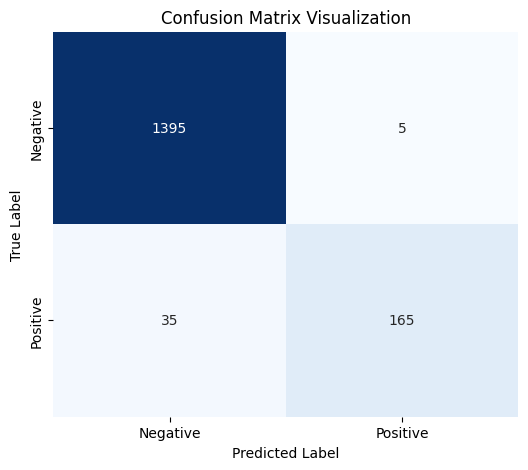

In [32]:
cm = confusion_matrix(y_test, search.predict(X_test))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Visualization")
plt.show()